In [1]:
import pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np
import math
%matplotlib inline

In [2]:
dataQ21 = pd.read_csv('data/figQ21.dat', index_col=False)
dataQ22 = pd.read_csv('data/figQ22.dat', index_col=False)
dataThIQ = pd.read_csv('data/figThIQ.dat', index_col=False)
data_israel_boosted = pd.read_csv('data/fig2_israel_boosted.dat', index_col=False)
data_israel_jan21_fig1 = pd.read_csv('data/fig1israel_jan21.dat', index_col=False)
data_israel_jan21_fig2 = pd.read_csv('data/fig2israel_jan21.dat', index_col=False)

In [39]:
def make_plot_double_ratio(data 
                           , dataformatter='israel'
                           , name='virtuality'
                           , title='' , xlabel='$\\nu$ [GeV$^{2}$]' , ylabel= r'$\frac{(P_{x}/P_{z})_{^{2}H}}{(P_{x}/P_{z})_{H}}$'
                           , xmin = -0.12 , xmax = 0.06
                           , ymin = 0.65 , ymax = 1.3
                           , DoPlotRatioToHA = False 
                           , add_preliminary_label = True 
                           , legend_loc='best' 
                           , figsize=(12,8)
                           , ytext=None):


    data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]
    if 'israel' in dataformatter:
        data.X = -data.X
    x = data.X 
    xerr = data.dX
    xList = [data.X[data.Setup=='kin1'],data.X[data.Setup=='kin2'],data.X[data.Setup=='kin3'],data.X[data.Setup=='kin4']]
    xerrList = [data.dX[data.Setup=='kin1'],data.dX[data.Setup=='kin2'],data.dX[data.Setup=='kin3'],data.dX[data.Setup=='kin4']]
    y = data.R3D / data.H
    yerr = -data.dR3D / data.H
    yList = [data.R3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             data.R3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             data.R3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             data.R3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    yerrList = [-data.dR3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             -data.dR3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             -data.dR3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             -data.dR3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    xArenhovel = x
    yArehnovel = data.M7 / data.H
    yHAList = [data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    yHAerrList = [-data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             -data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             -data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             -data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    
    fig = plt.figure(figsize=figsize)
    colorList = ['black','black','black','black']
    markerList= ['v','s','o','^']
    labels    = ['setup-A','setup-B','setup-C','setup-D']
    for i in range(len(xList)):
        plt.scatter(xList[i], yList[i], color = colorList[i],
                    marker= markerList[i],
                    label=labels[i],
                    s=100)
        plt.errorbar(xList[i], yList[i], 
                     xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                     color = colorList[i],
                     marker= markerList[i],
                     linestyle = 'none',
                    markersize=12)
    plt.title(title,fontsize=25)    
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    ax = fig.add_subplot(111)
    ax.grid(True,linestyle='-',color='0.75')
    if add_preliminary_label:
        ax.text( xmin+(xmax-xmin)/5., ymin+(ymax-ymin)/3. , "preliminary" , fontsize=70 , color='red' , alpha = 0.05 )

    matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
    plt.scatter(xArenhovel , yArehnovel, marker=[6,2,0], color='r',label='Calculations',s=200)
    ax.legend(scatterpoints=1,loc=legend_loc)
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    
#     ax.xaxis.set_ticks(np.arange(xmin*0.95,xmax*1.05, 20))
    # make the virtuality labels negative
    if 'virtuality' in name:
        xx, locs = plt.xticks()
        ll = ['-%.2f' % math.fabs(a) for a in xx]
        plt.xticks(xx, ll)


    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig("/Users/erezcohen/Desktop/"+name+".pdf")
    
    if DoPlotRatioToHA:
        x , y , y_err = [] , [] , [] 
        fig = plt.figure(figsize=figsize)
        colorList = ['black','black','black','black']
        markerList= ['v','s','^','o']
        for i in range(len(xList)):
            y_ratio = yList[i]/yHAList[i]
            y_ratio_err = yerrList[i]/yHAList[i]
            plt.scatter(xList[i], y_ratio, color = colorList[i],
                         marker= markerList[i],
                         label=labels[i],
                        s=100)
            plt.errorbar(xList[i], y_ratio, 
                         xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                         color = colorList[i],
                         marker= markerList[i],
                         linestyle = 'none',
                        markersize=12)
            for x_,y_,y_err_ in zip(xList[i],y_ratio,y_ratio_err):
                x.append(x_)
                y.append(y_)
                y_err.append(y_err_)
            
        plt.xlabel(xlabel,fontsize=25)
        plt.ylabel( r'$\frac{data}{HA-calculation}$',fontsize=25)
        ax = fig.add_subplot(111)
        ax.grid(True,linestyle='-',color='0.75')
        matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='-',linewidth=40,color='#d3d3d3')
        matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='black')
        if add_preliminary_label:
            ax.text( xmin+(xmax-xmin)/5., 1.0 , "preliminary" , fontsize=70 , color='red' , alpha = 0.05 )
        plt.xlim(xmin,xmax)
    
        # make the virtuality labels negative
        if 'virtuality' in name:
            xx, locs = plt.xticks()
            ll = ['-%.2f' % math.fabs(a) for a in xx]
            plt.xticks(xx, ll)
        
        p1,v1 = np.polyfit( x , y , 0 , cov=True)
        
        x = np.linspace(np.min(xmin),np.max(xmax),100)
        y,yerr = p1*np.ones(len(x)) , np.sqrt(float(v1))*np.ones(len(x))  
        plt.plot( x , y , 'r-')
        plt.fill_between( x , y-yerr , y+yerr , color='red' , alpha=0.1) 
        if ytext is None:
            ytext = 1.02*p1-np.sqrt(v1)
        plt.text( np.average(x) , ytext , '$%.2f\\pm%.2f$'%(p1,np.sqrt(v1)) , color='red' , fontsize=25)
        
        plt.tick_params(axis='both', which='major', labelsize=20)
        ax.legend(scatterpoints=1,loc=legend_loc)
        plt.savefig("/Users/erezcohen/Desktop/"+name+"_ratio_to_HA.pdf")

# ratio plots

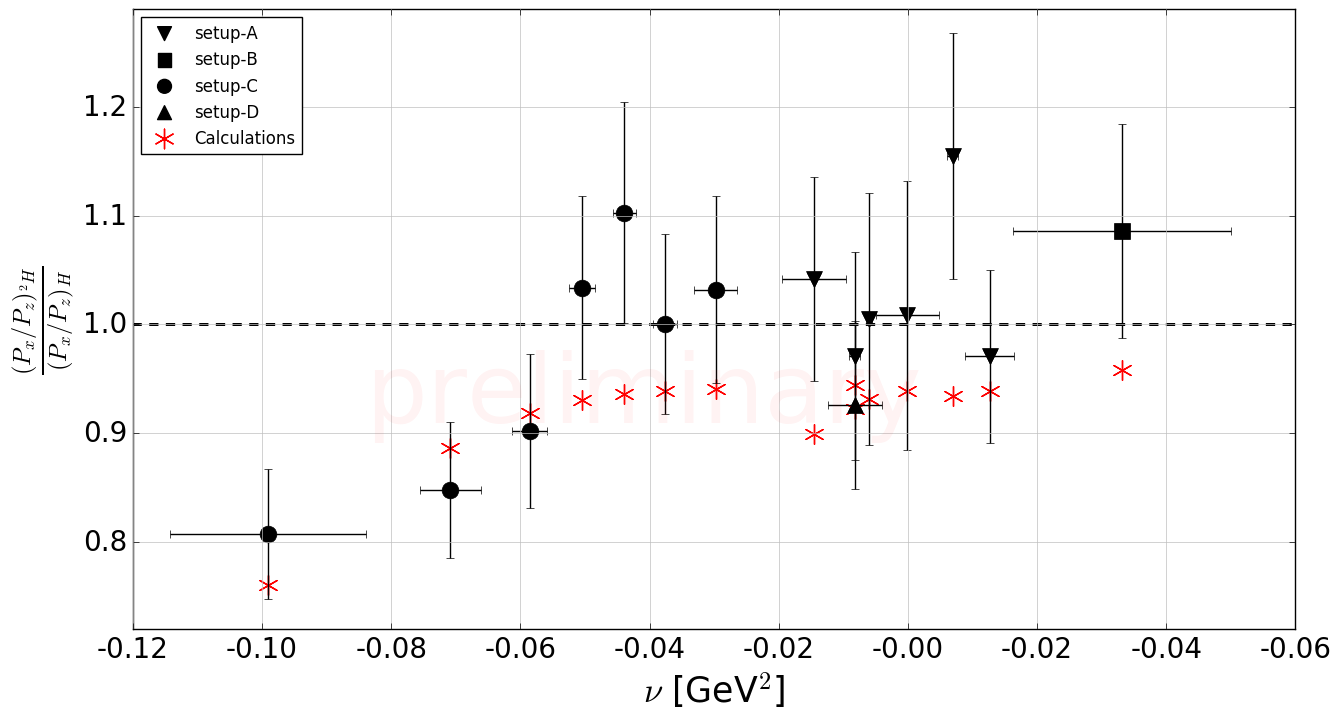

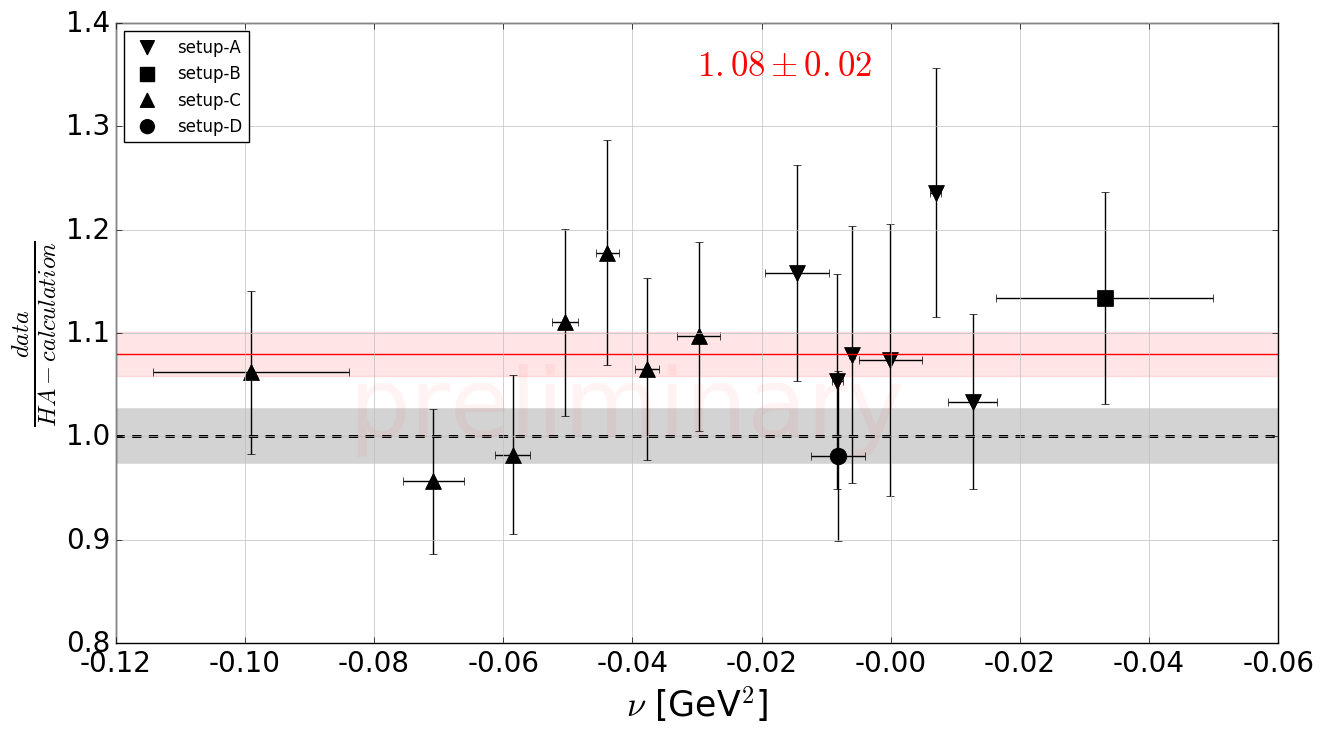

In [40]:
make_plot_double_ratio(data=data_israel_jan21_fig2                        
                       , xmin = -0.12 , xmax = 0.06
                       , ymin = 0.72 , ymax = 1.29
                       , DoPlotRatioToHA = True , figsize=(15,8) 
                       , legend_loc='upper left'
                       , ytext=1.35)

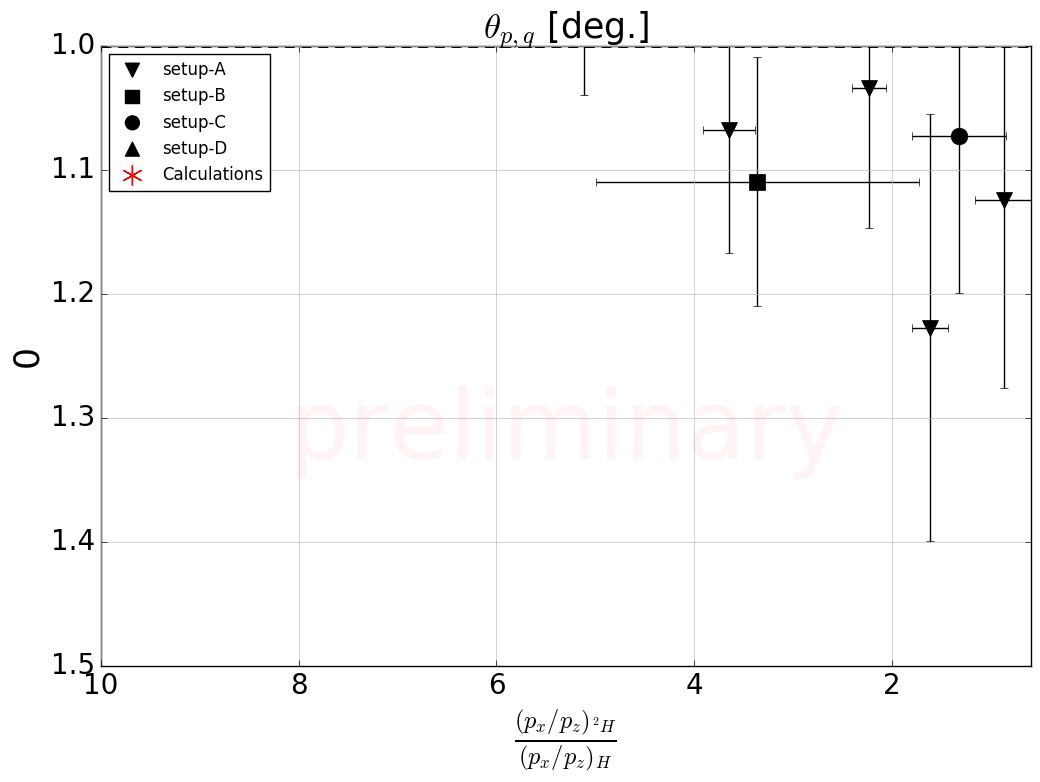

In [46]:
# data = dataQ22
make_plot_double_ratio( dataQ22 , "theta_pq" ,
                       '' ,'$\\theta_{p,q}$ [deg.]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       0 , 10 , 0.6 , 1.5 , 
                       True )
# data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]

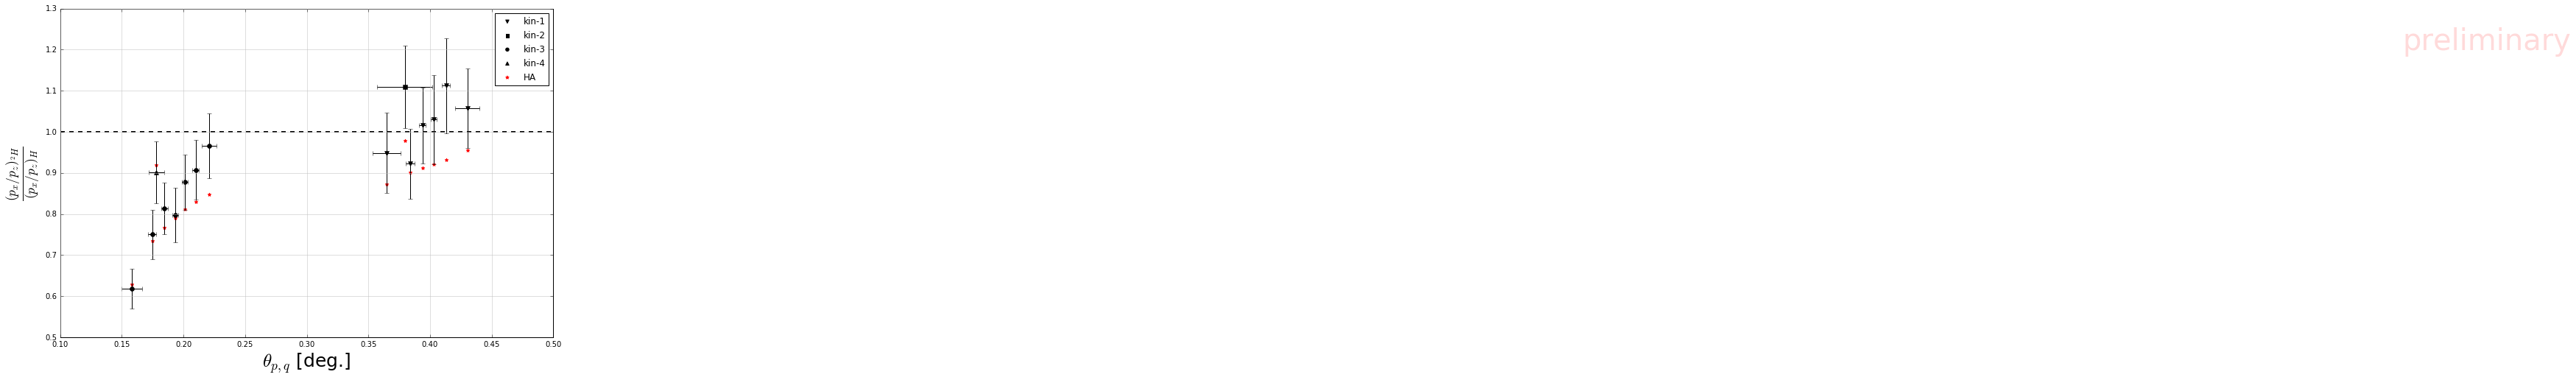

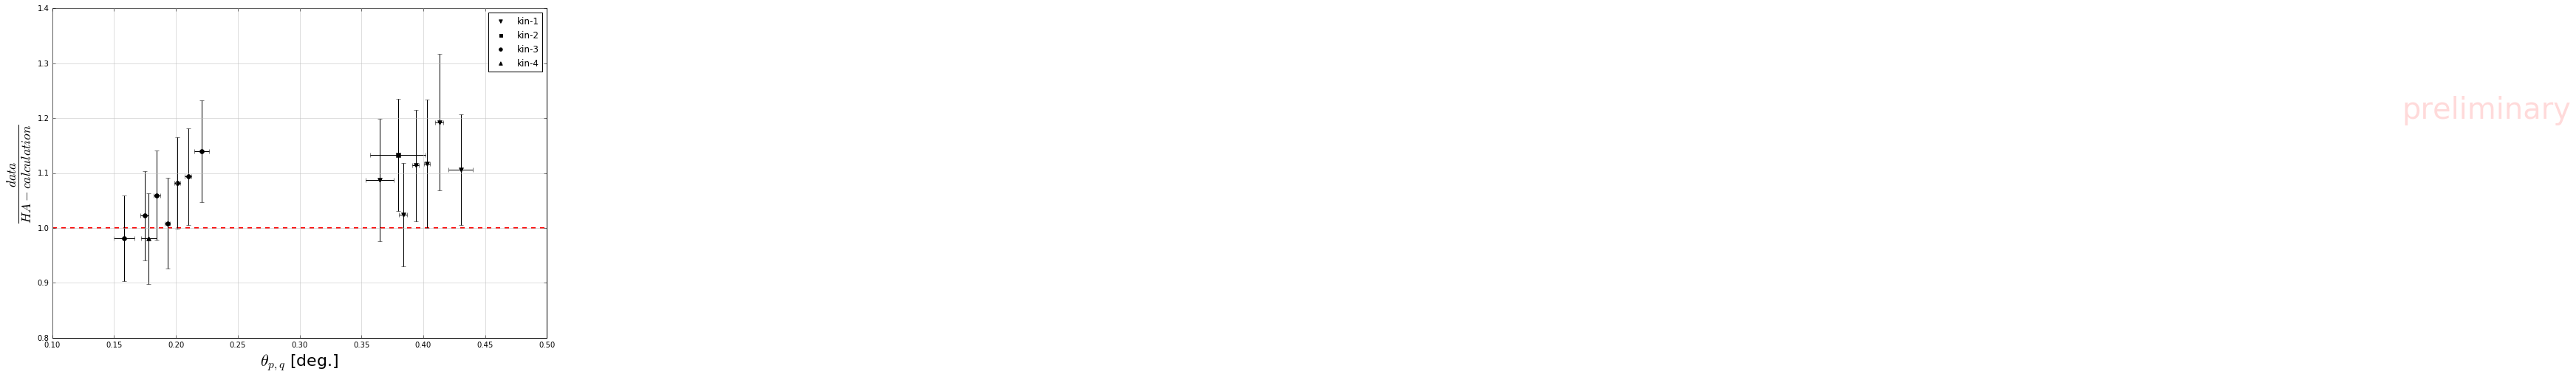

In [6]:
make_plot_double_ratio( dataQ21 , "theta_pq" ,
                       '' ,'$\\theta_{p,q}$ [deg.]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       True )



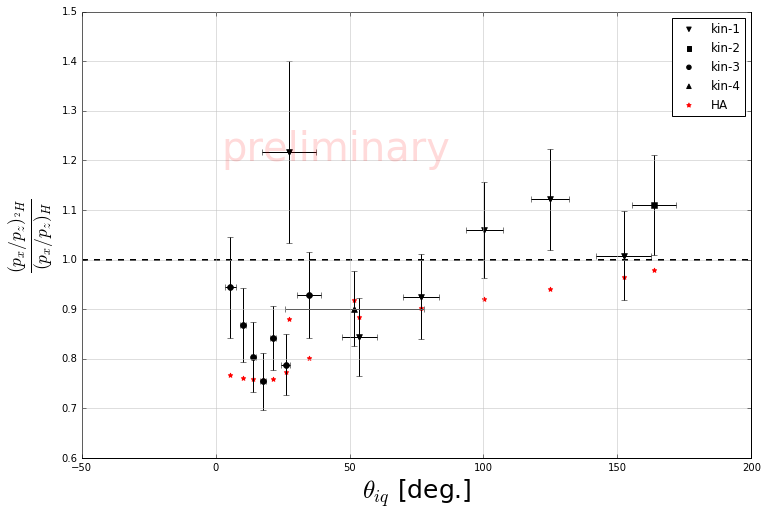

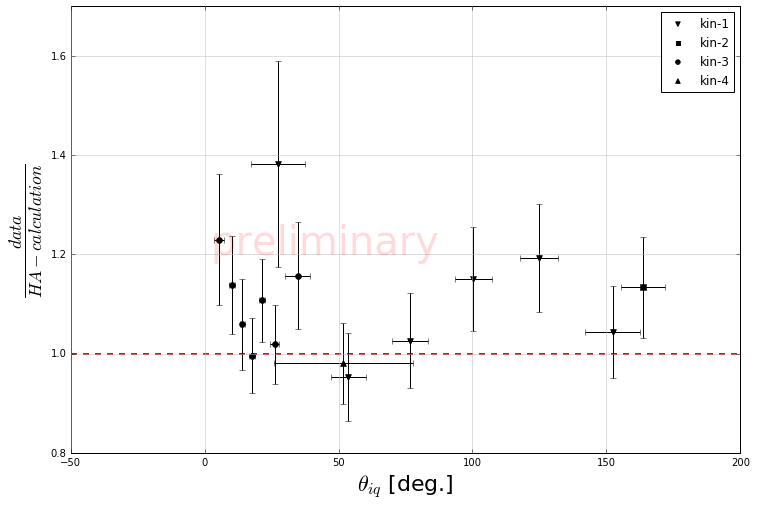

In [9]:
make_plot_double_ratio( dataThIQ , "theta_iq" ,
                       '' ,'$\\theta_{iq}$ [deg.]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       True )

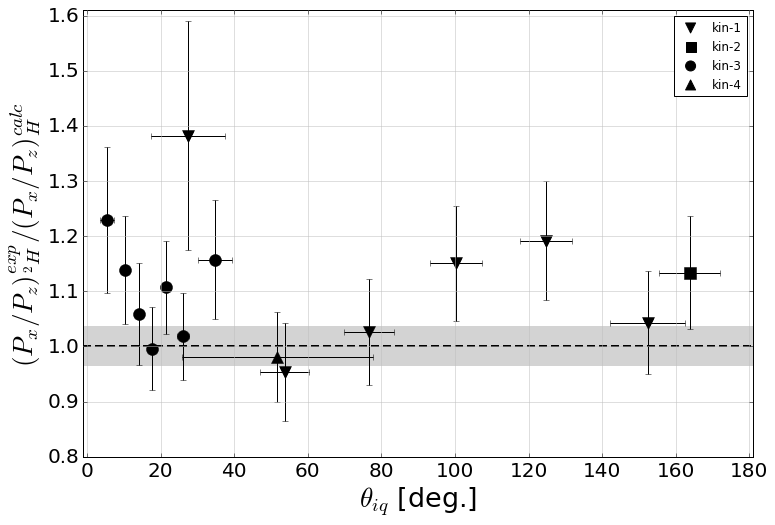

In [18]:
# now plot ratio of data to calculations...
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1),
                s=100)
    plt.errorbar(xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none',                 
                 markersize=12)
ax = fig.add_subplot(111)
#ax.text( 52, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='-',linewidth=40,color='#d3d3d3')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='black')
ax.legend(scatterpoints=1)
# cosmetics...
plt.xlabel('$\\theta_{iq}$ [deg.]',fontsize=27)
plt.ylabel( r'$(P_{x}/P_{z})^{exp}_{^{2}H} / (P_{x}/P_{z})^{calc}_{H}$',fontsize=27)
plt.ylim(.8, 1.61)
plt.xlim(-1,181)
ax.xaxis.set_ticks(np.arange(0, 200, 20))
plt.tick_params(axis='both', which='major', labelsize=20)


plt.savefig("/Users/erezcohen/Desktop/theta_iq_ratio_to_HA.pdf")

In [19]:
dataNuIsrael = pd.read_csv('data/fig2_israel.dat', index_col=False)
data = dataNuIsrael
data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]
data

,Setup,bin,X,dX,R3D,dR3D,PyRes,dPyRes,M7,1,H
1,kin1,1,-0.01269,0.00445,-0.68863,0.05633,0.02647,0.03663,-0.69839,1.0,-0.72118
2,kin1,2,-0.00694,0.00086,-0.83740,0.08173,-0.07131,0.04234,-0.71213,1.0,-0.72764
3,kin1,3,0.00006,0.00487,-0.74260,0.09099,-0.03926,0.05114,-0.72750,1.0,-0.73654
4,kin1,4,0.00602,0.00051,-0.74817,0.08640,-0.01195,0.04465,-0.72884,1.0,-0.74481
5,kin1,5,0.00826,0.00085,-0.72771,0.07198,-0.01590,0.04010,-0.72523,1.0,-0.74868
6,kin1,6,0.01454,0.00500,-0.79498,0.07183,-0.02103,0.03781,-0.72121,1.0,-0.75454
7,kin2,0,-0.03313,0.01690,-0.87918,0.07946,-0.03034,0.02022,-0.81109,1.0,-0.82216
9,kin3,1,0.02974,0.00411,-1.20852,0.10070,-0.00124,0.02557,-1.15657,1.0,-1.24554
10,kin3,2,0.03767,0.00185,-1.18224,0.09782,-0.01613,0.02191,-1.16340,1.0,-1.28044
11,kin3,3,0.04389,0.00179,-1.31366,0.12133,-0.03696,0.02120,-1.16859,1.0,-1.30772


In [20]:
x = data.X
xerr = data.dX
xList = [data.X[data.Setup=='kin1'],data.X[data.Setup=='kin2'],data.X[data.Setup=='kin3'],data.X[data.Setup=='kin4']]
xerrList = [data.dX[data.Setup=='kin1'],data.dX[data.Setup=='kin2'],data.dX[data.Setup=='kin3'],data.dX[data.Setup=='kin4']]
y = data.R3D / data.H
yerr = -data.dR3D / data.H
yList = [data.R3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.R3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.R3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.R3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yerrList = [-data.dR3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.dR3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.dR3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.dR3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
xArenhovel = x
yArehnovel = data.M7 / data.H
yHAList = [data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yHAerrList = [-data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yArehnovel

1     0.968399
2     0.978685
3     0.987726
4     0.978558
5     0.968678
6     0.955827
7     0.986535
9     0.928569
10    0.908594
11    0.893609
12    0.877032
13    0.855035
14    0.815714
15    0.680233
16    0.974004
dtype: float64

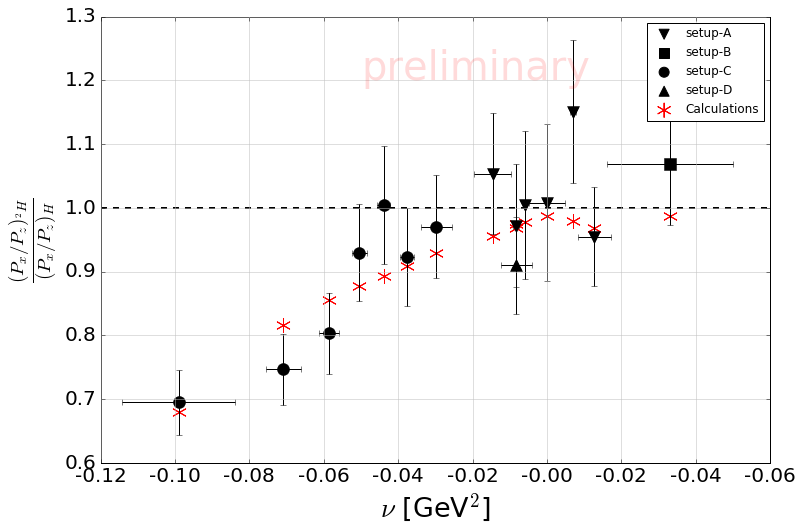

In [77]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
labels    = ['setup-A','setup-B','setup-C','setup-D']

for i in range(len(xList)):
    plt.scatter(-xList[i], yList[i], color = colorList[i],
                 marker= markerList[i],
                 label=labels[i],
                 s=100)
    plt.errorbar(-xList[i], yList[i], 
                 xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none',
                 markersize=12)
ax = fig.add_subplot(111)
ax.text( -0.05, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
plt.scatter(-xArenhovel , yArehnovel, marker=[6,2,0], color='r',label='Calculations',s=200)

# cosmetics...
plt.xlabel('$\\nu$ [GeV$^{2}$]',fontsize=27)
plt.ylabel( r'$\frac{(P_{x}/P_{z})_{^{2}H}}{(P_{x}/P_{z})_{H}}$',fontsize=27)
plt.ylim(.6, 1.3)
plt.xlim(-0.12,0.055)
#ax.xaxis.set_ticks(np.arange(0, -0.1, 0.1))
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.xticks( np.arange(5), (-0.012,-0.05,0,0.01,0.03) )
xx, locs = plt.xticks()
ll = ['-%.2f' % math.fabs(a) for a in xx]
plt.xticks(xx, ll)
ax.legend(scatterpoints=1,loc='upper right')
plt.savefig("/Users/erezcohen/Desktop/neu_israel.pdf")

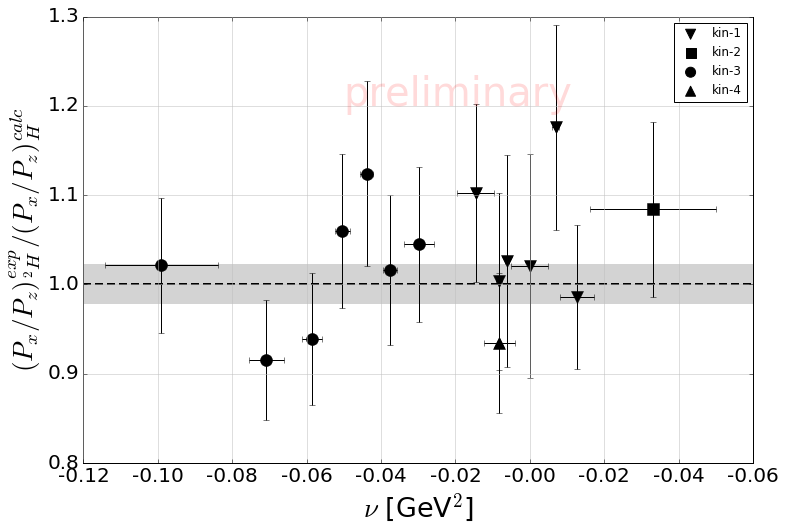

In [78]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(-xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1),
                s=100)
    plt.errorbar(-xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none',                 
                 markersize=12)
ax = fig.add_subplot(111)
ax.text( -0.05, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='-',linewidth=40,color='#d3d3d3')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='black')
ax.legend(scatterpoints=1)
# cosmetics...
plt.xlabel('$\\nu$ [GeV$^{2}$]',fontsize=27)
plt.ylabel( r'$(P_{x}/P_{z})^{exp}_{^{2}H} / (P_{x}/P_{z})^{calc}_{H}$',fontsize=27)
plt.ylim(.8, 1.3)
plt.xlim(-0.12,0.055)
plt.tick_params(axis='both', which='major', labelsize=20)
xx, locs = plt.xticks()
ll = ['-%.2f' % math.fabs(a) for a in xx]
plt.xticks(xx, ll)
plt.savefig("/Users/erezcohen/Desktop/nu_israel_ratio_to_HA.pdf")